### Things to do with distributions

I want to explore the best tools for doing basic tasks with distributions. Distributions are available at least in numpy, scipy.stats, pymc3, and sympy.stats. So, I'm going to experiment with a few here and see how things feel.

First I'll import everything.

In [16]:
import numpy as np
import pymc3 as pm
import scipy.stats as scistats
import sympy.stats as systats  # sigh

from sympy import init_printing
init_printing(use_unicode=True)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (12, 8), 'xtick.labelsize': 14, 'ytick.labelsize': 14})
sns.set_style('white')
sns.set_palette(sns.color_palette('colorblind', 8))

Now let's plot a shifted normal, and sample values from it.

### Numpy

#### Define and plot the distribution

<function <lambda> at 0x7fd6bace8ea0>
CPU times: user 34 ms, sys: 140 µs, total: 34.1 ms
Wall time: 33.5 ms


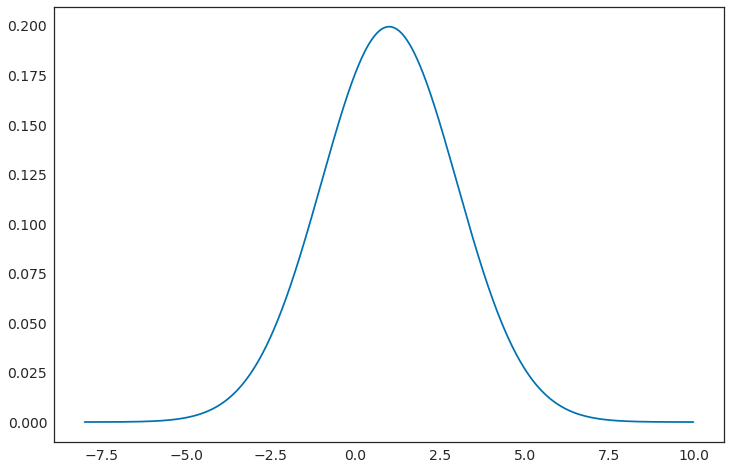

In [22]:
%%time
mu, sigma = 1, 2
N = 10000
x = np.arange(-8, 10, 0.01)
# Not available directly in numpy
dist = lambda x: 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
plt.plot(x, dist(x));
print(dist)

#### Draw 10k random samples

In [23]:
%%time
data = np.random.normal(mu, sigma, N)
print(np.mean(data), np.std(data))

1.001752674629025 2.008302659799883
CPU times: user 1.48 ms, sys: 116 µs, total: 1.59 ms
Wall time: 910 µs


#### Compute probabilities

Nothing straightforward.

#### Compute percentiles

In [25]:
# Hacky
sorted(data)[round(N * 0.25)]

Nothing straightforward.

### Scipy

#### Define and plot the distribution

CPU times: user 36.2 ms, sys: 8 µs, total: 36.2 ms
Wall time: 35.6 ms


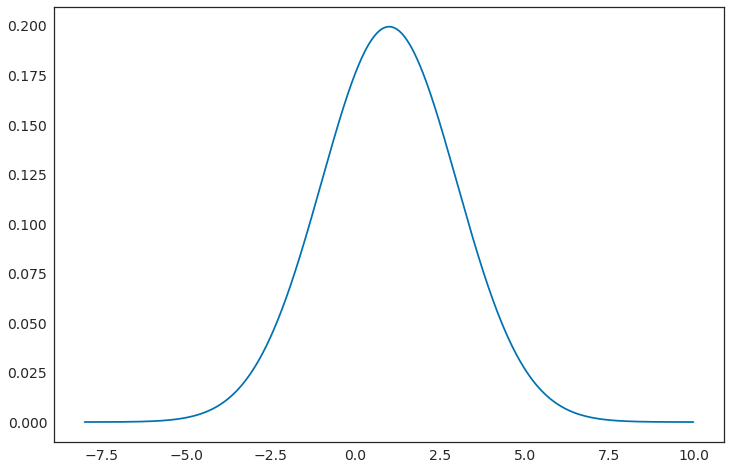

In [46]:
%%time
dist = scistats.norm(mu, sigma)
plt.plot(x, dist.pdf(x));
dist

#### Draw 10k random samples

In [47]:
%%time
data = dist.rvs(N)
print(np.mean(data), np.std(data))

0.9947127973545034 2.023102347370048
CPU times: user 2.58 ms, sys: 0 ns, total: 2.58 ms
Wall time: 1.46 ms


#### Probability of an interval
$P(0 \le X \le 2.5)$

In [48]:
%%time
dist.cdf(2.5) - dist.cdf(0)

CPU times: user 391 µs, sys: 32 µs, total: 423 µs
Wall time: 369 µs


#### Percentile values

In [49]:
%%time
dist.ppf([0.05, 0.25, 0.5, 0.75, 0.95])

CPU times: user 401 µs, sys: 32 µs, total: 433 µs
Wall time: 355 µs


array([-2.28970725, -0.3489795 ,  1.        ,  2.3489795 ,  4.28970725])

### Pymc3

#### Define and plot the distribution

CPU times: user 85.2 ms, sys: 79 µs, total: 85.2 ms
Wall time: 84.6 ms


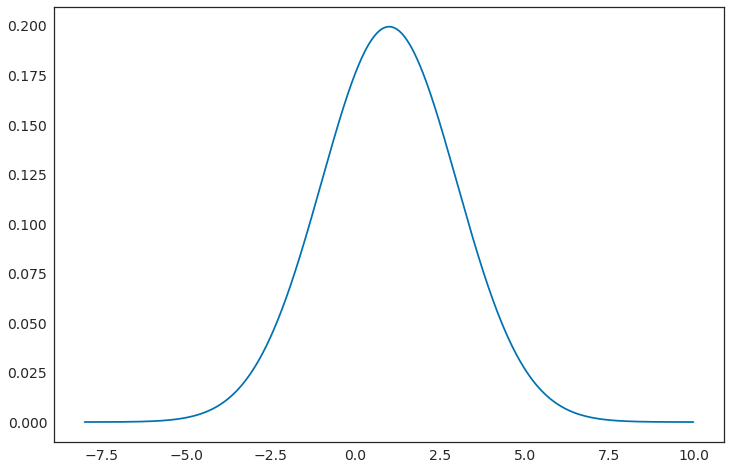

In [52]:
%%time
dist = pm.Normal.dist(mu, sigma)
plt.plot(x, np.exp(dist.logp(x).eval()));
dist

#### Draw 10k random samples

In [53]:
%%time
data = dist.random(size=N)
print(np.mean(data), np.std(data))

1.0328387682482494 1.974495977336677
CPU times: user 0 ns, sys: 3.23 ms, total: 3.23 ms
Wall time: 1.95 ms


#### Probability of an interval
$ P(0 \le X \le 2.5) $

In [60]:
dist

### Sympy

#### Define and plot the distribution

CPU times: user 48.7 ms, sys: 0 ns, total: 48.7 ms
Wall time: 48.3 ms


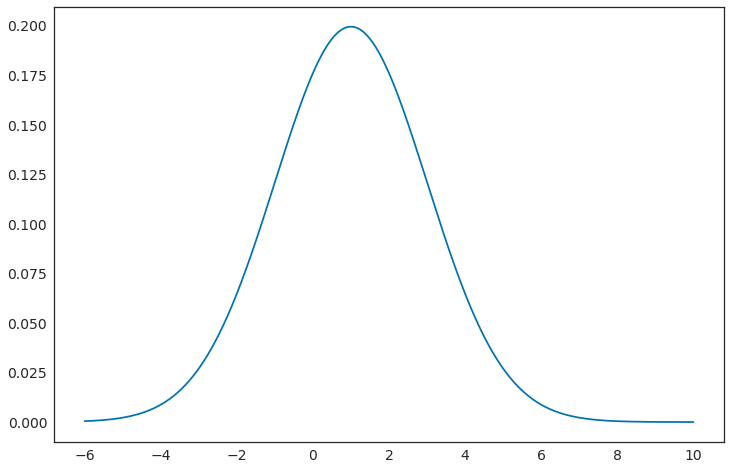

In [106]:
%%time
from sympy import lambdify, symbols
y = symbols('y')
X = systats.Normal('X', mu, sigma)
pdf = systats.density(X)(y)
pdf_fn = lambdify(y, pdf, 'numpy')
plt.plot(x, pdf_fn(x));
pdf

#### Draw 10k random samples

In [107]:
%%time
data = list(map(float, systats.sample_iter(X, numsamples=N)))
np.mean(data), np.std(data)

CPU times: user 580 ms, sys: 0 ns, total: 580 ms
Wall time: 582 ms


#### Probability of an interval
$ P(0 \le X \le 2.5) $

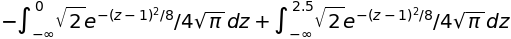

In [120]:
systats.P(X <= 2.5, evaluate=False) - systats.P(X <= 0, evaluate=False)

In [121]:
(systats.P(X <= 2.5) - systats.P(X <= 0)).evalf()

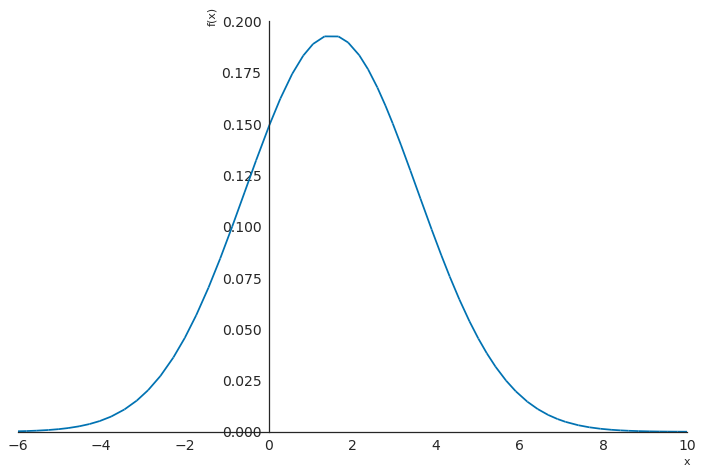

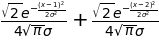

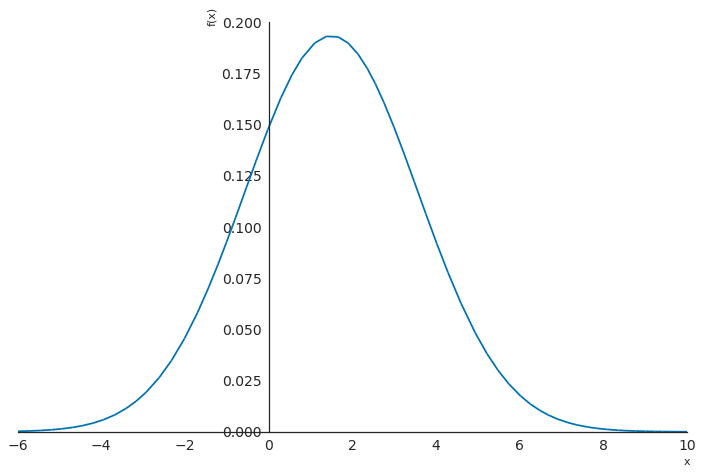

In [165]:
(y1_pdf/2 + y_pdf/2 - y_pdf).subs({x:1}).evalf()

In [167]:
systats.variance(y)